# Loading data :

In [3]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

# Question 1 :

C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.49347e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.64526e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


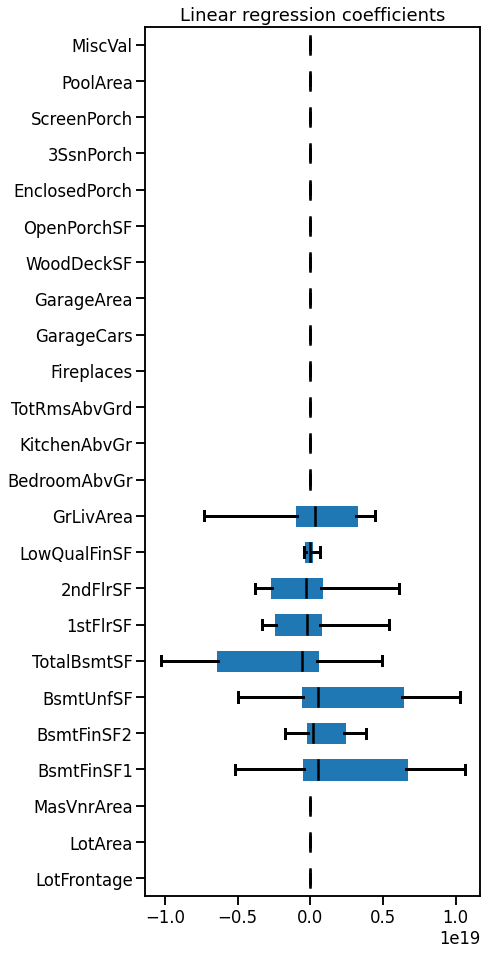

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

ridge_regression = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0),
)

cv_results = cross_validate(ridge_regression, data_numerical, target,
                            cv=10,# scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

# Solution 1 :

C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.49347e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\33786\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.64526e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


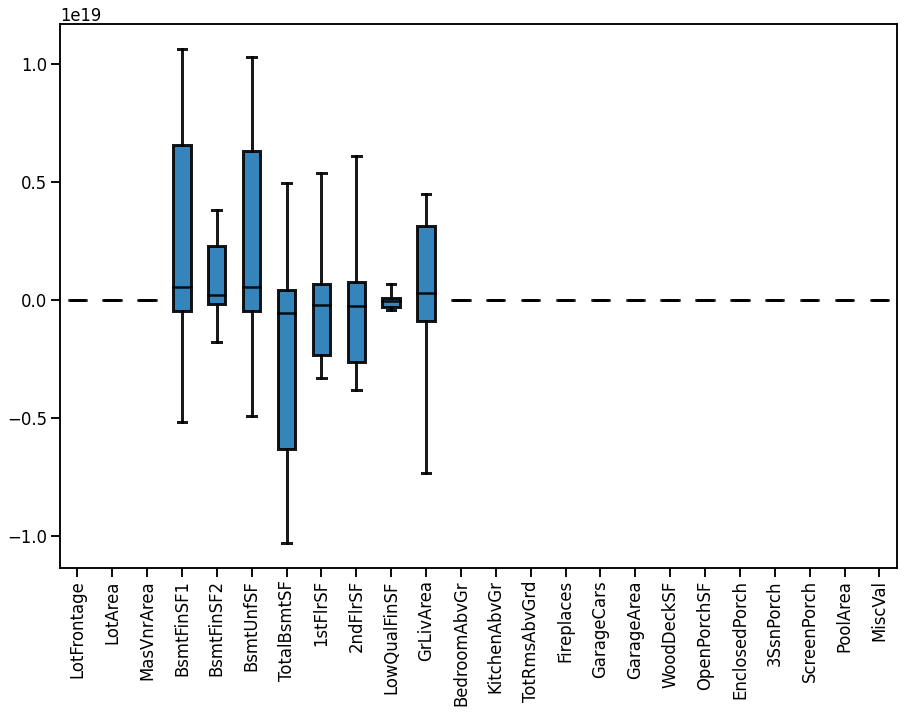

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), Ridge(alpha=0))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

# Question 2 :

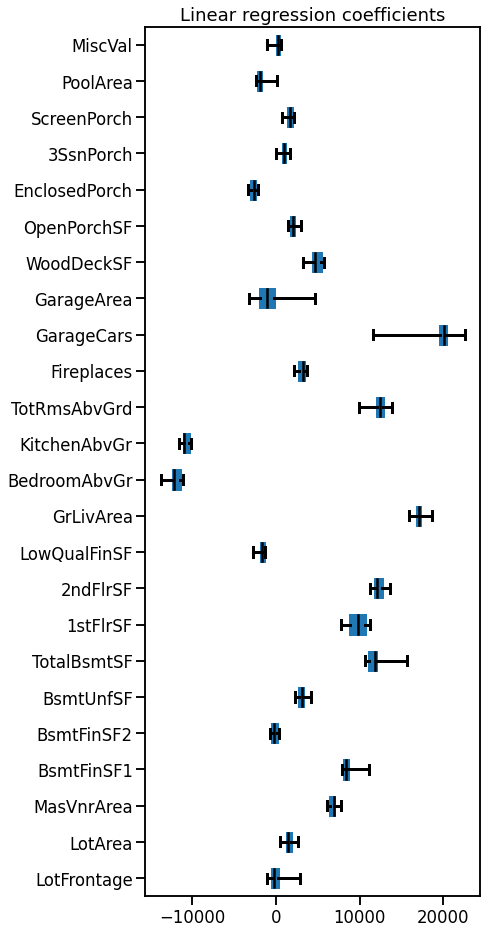

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

ridge_regression = make_pipeline(
    StandardScaler(),
    Ridge(),
)

cv_results = cross_validate(ridge_regression, data_numerical, target,
                            cv=10,# scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

# Solution 2 :

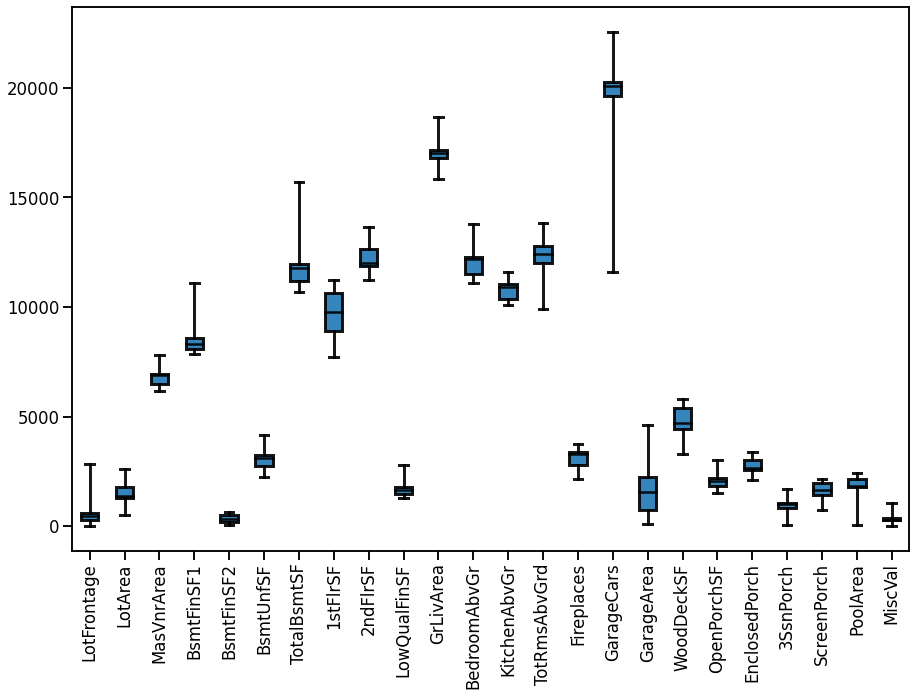

In [6]:
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)

coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

# Question 3 :